# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import scipy.stats
import math
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


#### Question 1
<li>  Is the distribution of body temperatures normal? 

In [12]:
df=df.sort_values(by='temperature')

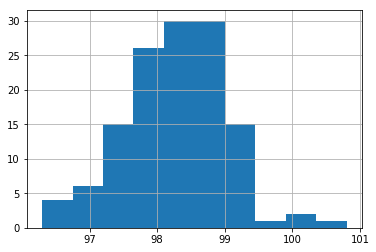

In [13]:
df.temperature.hist()

In [43]:
k2,p=scipy.stats.normaltest(df.temperature)
print(p)
if p>0.05:
    print('normal')
else:
    print('not_normal')

0.2587479863488254
normal


In [44]:
####p is bigger than 0.05, cannot reject the hypothesis, distribution is normal. 

#### Question 2
Is the sample size large? Are the observations independent?

In [20]:
df.shape

(130, 3)

In [42]:
##Sample size is 130, and it is larger than 30. it is big enough. And they are from different people. They are independent samples.

#### Question 3
Is the true population mean really 98.6 degrees F?

In [26]:
mean_temp=df.temperature.mean()
std_temp=df.temperature.std()
z=(mean_temp-98.6)/(std_temp/130**0.5)
import scipy.stats as stats
P_value=stats.norm.cdf(z) * 2
print(P_value)
if p>0.05:
    print('yes')
else:
    print('no')

4.90215701411338e-08
no


In [40]:
t_stat = stats.ttest_1samp(df.temperature, 98.6)
print('t-score: {}\np-value: {}'.format(round(t_stat.statistic, 5), round(t_stat.pvalue, 5)))

t-score: -5.45482
p-value: 0.0


In [41]:
###p value is low, and less than 0.05, reject the hypothesis.It is not really 98.6.

#### Question 4
Draw a small sample of size 10 from the data and repeat both frequentist tests. 
<li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

In [38]:
sample_temp = np.random.choice(a = df.temperature, size=10)
r = stats.ttest_1samp(sample_temp, 98.6)
print('t-score: {:0.4}\np-value: {:0.4}'.format(r.statistic, r.pvalue))

t-score: -1.792
p-value: 0.1067


In [39]:
###pvalue is bigger than 0.05, cannot reject the hypothesis. 
###Since the variance is unknown, ttest is the only way is do the test.

#### Question 5
At what temperature should we consider someone's temperature to be "abnormal"?

In [28]:
z = 1.96 * std_temp/ np.sqrt(130)
interval = mean_temp + np.array([-1, 1]) * z
interval

array([98.12319411, 98.37526743])

In [29]:
###Normal temperature is from 98.12 to 98.37, and 98.6 is not normal.

#### Question 6
Is there a significant difference between males and females in normal temperature?

In [34]:
men=df[df.gender=='M']
women=df[df.gender=='F']
print(men.temperature.mean())
print(women.temperature.mean())

98.1046153846154
98.39384615384613


In [35]:
import scipy.stats as ss
ss.ttest_ind(men.temperature,women.temperature)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

In [45]:
###pvalue is less than 0.05, reject the hypothesis. Males and Females do have some sinificant 
#difference in temperature.